In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [31]:
# Create a 3 x 4 x 5 grid (short depth, medium width, tall height)
x_vals = [1, 2, 3]
y_vals = [1, 2, 3, 4]
z_vals = [1, 2, 3, 4, 5]
x, y, z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')

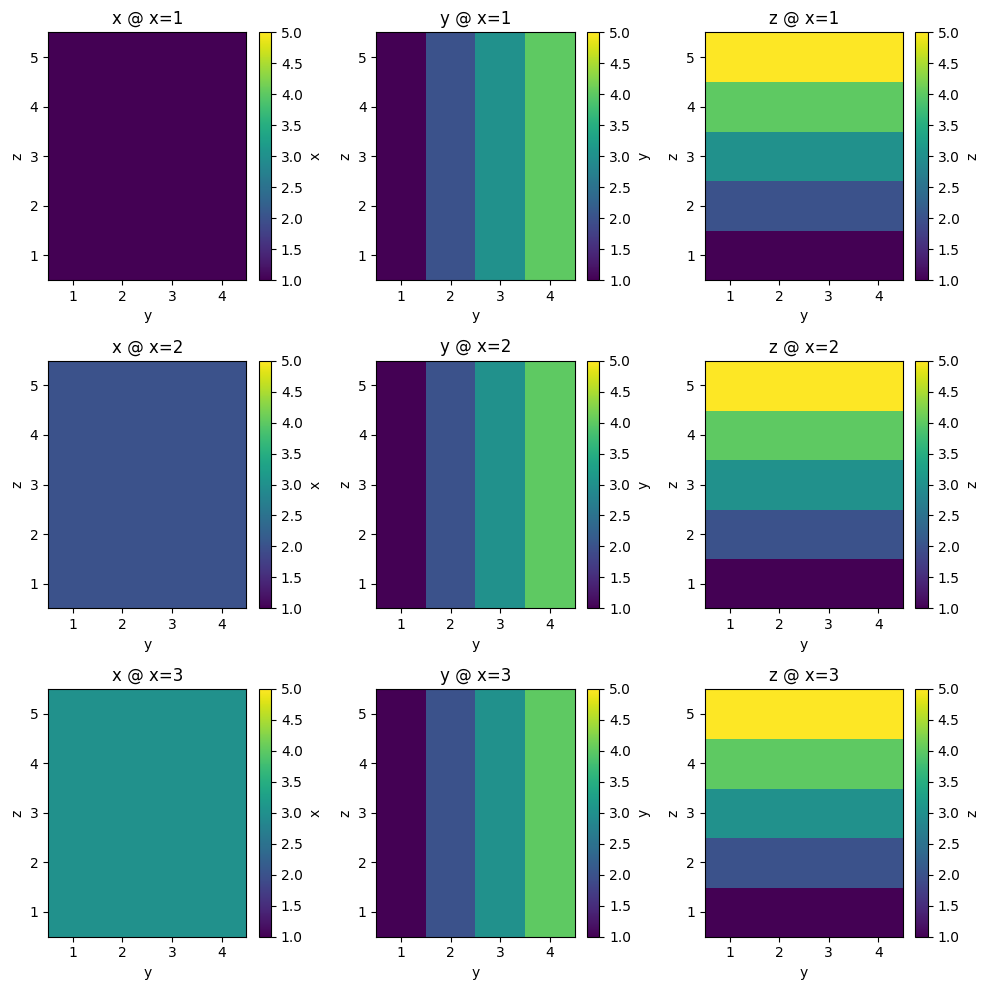

In [52]:
# Plot x slices / y,z-planes, which are the 'front' planes.
fig: plt.Figure
fig, axes = plt.subplots(len(x_vals), 3, figsize=(10, 10))
for i, (ax_row, x_val) in enumerate(zip(axes, x_vals)):
    for value_name, value_grid, ax in zip(['x', 'y', 'z'], [x, y, z], ax_row):
        ax.set_title(f'{value_name} @ x={x_val}')
        cax = ax.pcolor(y[i,:,:], z[i,:,:], value_grid[i,:,:], vmin=1, vmax=5)
        ax.set_aspect('equal')
        ax.set_xlabel('y')
        ax.set_ylabel('z')
        fig.colorbar(cax, orientation='vertical', label=value_name)

fig.set_tight_layout('tight')

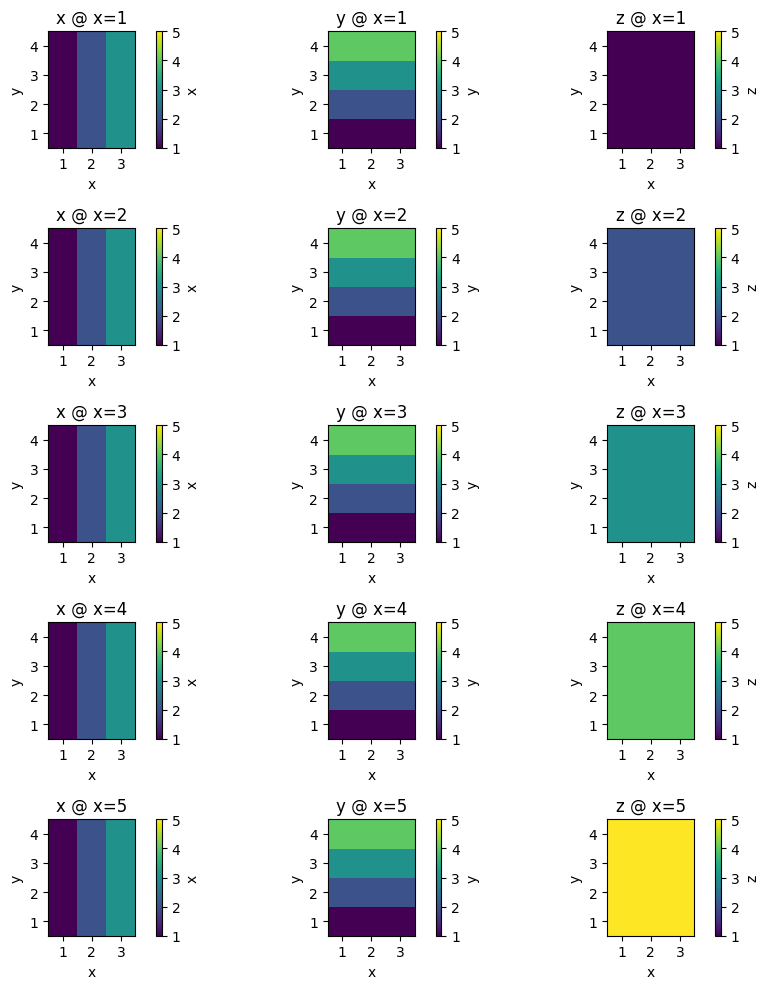

In [121]:
# Plot z slices / x,y-planes, which are the 'top' planes. Should plot from bottom up.
fig: plt.Figure
fig, axes = plt.subplots(len(z_vals), 3, figsize=(10, 10))
for i, (ax_row, z_val) in enumerate(zip(axes, z_vals)):
    for value_name, value_grid, ax in zip(['x', 'y', 'z'], [x, y, z], ax_row):
        ax.set_title(f'{value_name} @ x={z_val}')
        cax = ax.pcolor(x[:,:,i], y[:,:,i], value_grid[:,:,i], vmin=1, vmax=5)
        ax.set_aspect('equal')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        fig.colorbar(cax, orientation='vertical', label=value_name)

fig.set_tight_layout('tight')

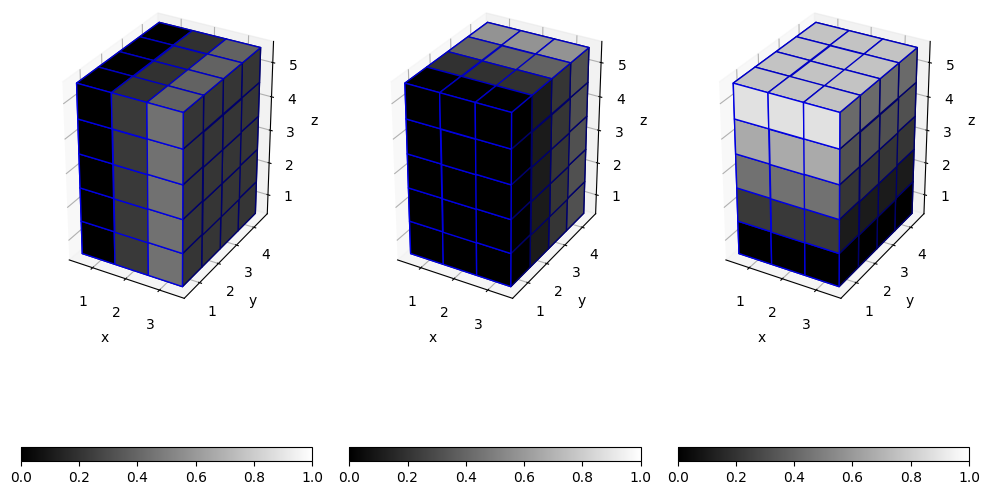

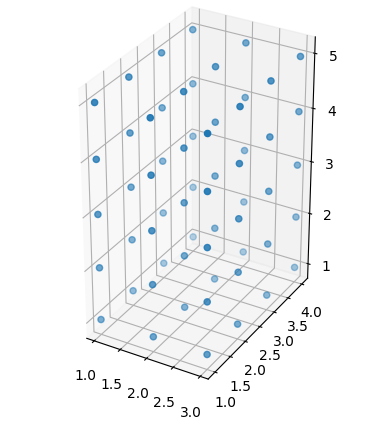

In [119]:
# Plot 3D
def to_corners(centres: list) -> list:
    # Assume width of one
    corners = [c - 0.5 for c in centres]
    return corners + [centres[-1] + 0.5]

def minmax_normalise(arr: np.ndarray) -> np.ndarray:
    return (arr - arr.min()) / (arr.max() - arr.min())

# Assume provided values specify coordinates of voxel centres.
x_vals = [1, 2, 3]
y_vals = [1, 2, 3, 4]
z_vals = [1, 2, 3, 4, 5]

x, y, z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')
x_corners, y_corners, z_corners = np.meshgrid(to_corners(x_vals), to_corners(y_vals), to_corners(z_vals), indexing='ij')
filled = np.ones_like(x)

fig, axes = plt.subplots(1, 3, subplot_kw={"projection": "3d"})
fig.set_size_inches(10, 10)
axes[0].voxels(x_corners, y_corners, z_corners, filled, facecolors=mpl.colormaps['gray']((x - 1) / 4), edgecolors='blue')
axes[1].voxels(x_corners, y_corners, z_corners, filled, facecolors=mpl.colormaps['gray']((y - 1) / 4), edgecolors='blue')
axes[2].voxels(x_corners, y_corners, z_corners, filled, facecolors=mpl.colormaps['gray']((z - 1) / 4), edgecolors='blue')
m = mpl.cm.ScalarMappable(cmap=plt.cm.gray)
for ax in axes:
    fig.colorbar(m, ax=ax, orientation='horizontal')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

fig.tight_layout()

# And just a plain ole centre plot

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter(x, y, z)
ax.set_aspect('equal')